<a href="https://colab.research.google.com/github/lwallac2/Bank-Marketing/blob/main/LastWeekdayWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [101]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from IPython.display import HTML # This is just for me so I can embed videos
from IPython.display import Image # This is just for me so I can embed images

#Reading in the data as adult dataframe
df = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/West_Nile_Virus__WNV__Mosquito_Test_Results.csv")

#Verifying that we can see the data
df.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


# Question 5


In [102]:
df.LOCATION.fillna(value = 'null', inplace = True)
df

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,null
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,null
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,null
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,null
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29484,2007,31,21734,22XX W 113TH ST,T086,GRAVID,08/07/2007 12:08:00 AM,23,negative,CULEX PIPIENS/RESTUANS,41.688171,-87.678252,"(41.688170589570205, -87.67825167603604)"
29485,2009,33,27885,58XX N WESTERN AVE,T028,GRAVID,08/25/2009 12:08:00 AM,1,negative,CULEX PIPIENS/RESTUANS,41.987245,-87.689417,"(41.98724460846669, -87.68941677018957)"
29486,2013,30,36525,109XX S COTTAGE GROVE AVE,T102,GRAVID,07/25/2013 12:07:00 AM,6,negative,CULEX RESTUANS,41.695494,-87.609082,"(41.695494070048184, -87.60908176561364)"
29487,2007,33,22451,73XX S CICERO AVE,T067,GRAVID,08/21/2007 12:08:00 AM,6,negative,CULEX PIPIENS/RESTUANS,41.760082,-87.741607,"(41.7600823529196, -87.74160716098964)"


In [61]:
df.TRAP_TYPE.value_counts()

GRAVID      27956
CDC          1256
SENTINEL      276
OVI             1
Name: TRAP_TYPE, dtype: int64

In [125]:
df_nn = pd.DataFrame(df, columns = ['SEASON YEAR', 'WEEK', 'TEST ID','NUMBER OF MOSQUITOES','TRAP_TYPE'])
df_nn.head()

,SEASON YEAR,WEEK,TEST ID,NUMBER OF MOSQUITOES,TRAP_TYPE
0,2014,39,40542,8,GRAVID
1,2016,37,44219,39,GRAVID
2,2017,33,45351,50,GRAVID
3,2017,33,45345,17,GRAVID
4,2016,37,44169,12,GRAVID


# Question 2

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_nn["TRAP_TYPE"] = labelencoder.fit_transform(df_nn["TRAP_TYPE"])
region = pd.DataFrame({'TRAP_TYPE': ['GRAVID', 'CDC', 'SENTINEL', 'OVI']})
df_nn.head()

,SEASON YEAR,WEEK,TEST ID,TRAP_TYPE,NUMBER OF MOSQUITOES
0,2014,39,40542,1,8
1,2016,37,44219,1,39
2,2017,33,45351,1,50
3,2017,33,45345,1,17
4,2016,37,44169,1,12


# Question 3

In [64]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
df_nn = create_dummies(df_nn,"TRAP_TYPE")

df_nn.head()

,SEASON YEAR,WEEK,TEST ID,TRAP_TYPE,NUMBER OF MOSQUITOES,TRAP_TYPE_0,TRAP_TYPE_1,TRAP_TYPE_2,TRAP_TYPE_3
0,2014,39,40542,1,8,0,1,0,0
1,2016,37,44219,1,39,0,1,0,0
2,2017,33,45351,1,50,0,1,0,0
3,2017,33,45345,1,17,0,1,0,0
4,2016,37,44169,1,12,0,1,0,0


In [65]:
# Features before mean normalization
unscaled_features = df_nn[['SEASON YEAR', 'WEEK', 'TEST ID','NUMBER OF MOSQUITOES']]

# Mean Normalization to have a faster classifier 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Calculate μ & σ(fit) and apply the transformation(transform)
unscaled_features_array = sc.fit_transform(unscaled_features.values)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
scaled_features = pd.DataFrame(unscaled_features_array, index=unscaled_features.index, columns=unscaled_features.columns)

scaled_features.head()

,SEASON YEAR,WEEK,TEST ID,NUMBER OF MOSQUITOES
0,0.393933,1.748481,0.624099,-0.285292
1,0.919884,1.307303,1.050163,1.746039
2,1.182859,0.424946,1.181331,2.466834
3,1.182859,0.424946,1.180635,0.304449
4,0.919884,1.307303,1.044369,-0.023185


# Question 4

In [93]:
bins = np.linspace(df['NUMBER OF MOSQUITOES'].min(),df['NUMBER OF MOSQUITOES'].max(),6)
bins

array([ 1. , 16.2, 31.4, 46.6, 61.8, 77. ])

In [94]:
labels = ['xs', 's', 'm','l','xl']

In [95]:
df3=df
df3['bins'] = pd.cut(df3['NUMBER OF MOSQUITOES'], bins=bins, labels=labels, include_lowest=True)

In [96]:
df3.groupby(['bins']).count()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
bins,,,,,,,,,,,,,
xs,22212,22212,22212,22212,22212,22212,22212,22212,22212,22212,19390,19390,22212
s,3036,3036,3036,3036,3036,3036,3036,3036,3036,3036,2452,2452,3036
m,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667,1325,1325,1667
l,2573,2573,2573,2573,2573,2573,2573,2573,2573,2573,1905,1905,2573
xl,1,1,1,1,1,1,1,1,1,1,1,1,1


# Question 6


In [98]:
df.WEEK.describe(include='all')

count    29489.000000
mean        31.073587
std          4.533390
min         20.000000
25%         28.000000
50%         31.000000
75%         35.000000
max         40.000000
Name: WEEK, dtype: float64

# QUESTION 7

In [135]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = df_nn['TRAP_TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)


# QUESTION 8

In [134]:
from sklearn.model_selection import train_test_split
x=df_nn.iloc[:,:4] # all parameters
y=df_nn['TRAP_TYPE'] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)                             
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (22116, 4)
X_test shape: (7373, 4)


# QUESTION 9 

In [113]:
DF = pd.DataFrame(df_nn, columns = ['SEASON YEAR', 'TEST ID','TRAP_TYPE'])

corr = DF.corr()
corr

,SEASON YEAR,TEST ID,TRAP_TYPE
SEASON YEAR,1.000000,0.994706,0.292849
TEST ID,0.994706,1.000000,0.300803
TRAP_TYPE,0.292849,0.300803,1.000000


# QUESTION 10

In [126]:
from sklearn.model_selection import train_test_split
x=df_nn.iloc[:,:4] # all parameters
y=df_nn['TRAP_TYPE'] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)                             
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (23591, 4)
X_test shape: (5898, 4)


In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [128]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
y_pred = rf.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9649033570701933

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


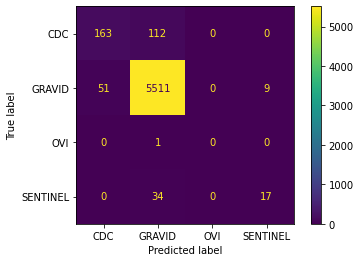

In [131]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)

In [132]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred, labels=['GRAVID', 'CDC', 'SENTINEL', 'OVI']))

              precision    recall  f1-score   support

      GRAVID       0.97      0.99      0.98      5571
         CDC       0.76      0.59      0.67       275
    SENTINEL       0.65      0.33      0.44        51
         OVI       0.00      0.00      0.00         1

    accuracy                           0.96      5898
   macro avg       0.60      0.48      0.52      5898
weighted avg       0.96      0.96      0.96      5898



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
